## Part1: Least Squares

1. Generate classification data of two classes

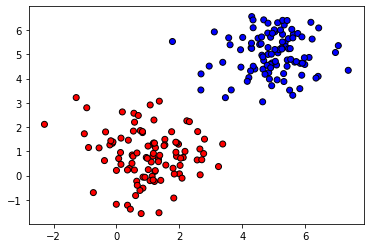

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N1 = 100
N2 = 100
K = 2
sigma = 1.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

2. Write code to estimate matrix W using least-squares.

In [2]:
X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

3. Draw the decision line

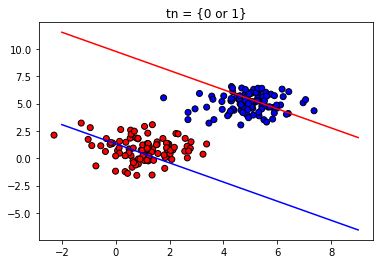

In [3]:
line_x = np.linspace(-2, 9)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {0 or 1}")
plt.show()


4. Change sigma to 7.0, and draw the decision line.

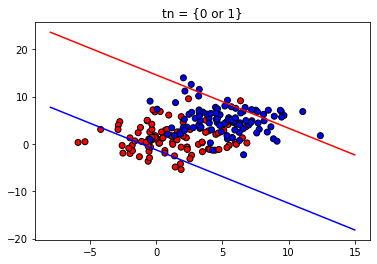

In [4]:
N1 = 100
N2 = 100
K = 2
sigma = 7.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-8, 15)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {0 or 1}")
plt.show()

5. Discuss how the classification performance is affected by it

As the sigma increases from 1 to 7, we can observe that the data has become not linearly separable without space transformation (two classes of data highly overlap with each other). 

Geometrically, since we have set tn to be {0, +1}, the optimal W would cause red line to move as far away from red dots as possible, but encourage the line to be as close to the center of blue dots as possible. Similarly, W would also cause blue line as far away from blue dots, but as close to red dots as possible. Therefore, as we can seen from the above graph, because two classes of data are not linearly separable, the red line is just enough to not cross most red dots and try to be as close to the center of blue dots cluster; on the other hand, the blue line is just enough to not cross most blue dots and try to be as close to the center of red dots. Because the data is originally not linearly separable, the classification performance suffers without some space transformation, but overall, the decision lines are located at where they should be. 

6. Keep sigma=7.0, but now change N2=10. Draw the decision line

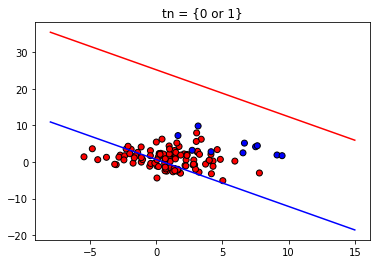

In [5]:
N1 = 100
N2 = 10
K = 2
sigma = 7.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-8, 15)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {0 or 1}")
plt.show()

7. Discuss how the classification performance is affected by it

As we can observe in the above graph, while the blue line is as close to the center of red dots cluster, the red line is far away from both cluster.

Geometrically, because we are using least square method, what decides W and ultimately decides the decision lines is the minimization of sum of error squares. Intuitively, what that means is that the decision line would be influenced (move around) more by the cluster/class that has more number of data points. 

In the above case, there are 100 red points, but only 10 blue points. To minimize the overall sum of error squares, because there are more red dots, the decision lines will be influenced more by the class of red dots. For the blue line, because it is intended to be close to the center of red dots (which has more influence over decision lines) and away from blue dots (which has less influence over decision lines), the blue line located relatively at the center of red dots cluster. 

However, for the red line, it is intended to be close to the center of blue dots (which has much less influence over decision lines) and far away from the red dots (which has much more influence over decision lines), but there are much more red dots than blue dots. To minimize overall sum of error squares, the red line has to be "pushed" much more far away by the red dots than the blue dots that are able to "pull" a bit closer. In other words, for the red decision line, because there are more red dots, the red dots have more "push" ability than the blue dots' "pull" ability. 

8. Set sigma=4.0 and N1=N2=100. Change tn to {-1, +1}, and draw the decision

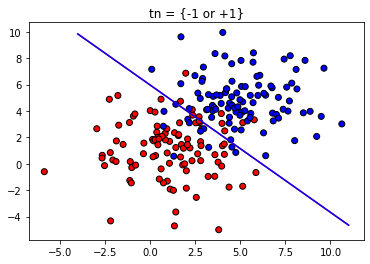

In [6]:
N1 = 100
N2 = 100
K = 2
sigma = 4.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = (-1) * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-4, 11)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {-1 or +1}")
plt.show()

9. Set tn back to {0, 1}, sigma=1.0. Modify the code for generating the data so that it includes outliers as shown below (the number of outlier points = 100, the same N2): 

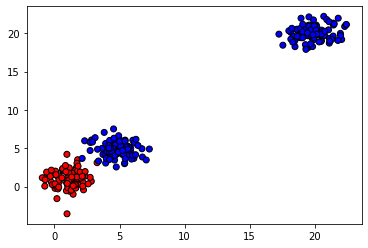

In [7]:
N1 = 100
N2 = 100
K = 2
sigma = 1.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2_original = np.random.multivariate_normal(mean, cov, N2)

mean = (20, 20)
cov = [[sigma, 0], [0, sigma]]
X2_outlier = np.random.multivariate_normal(mean, cov, N2)

X2 = np.concatenate((X2_original, X2_outlier))
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

10. Draw the decision lines (the left figure is when tn is {0,1}, and the right figure when tn is {-1, +1})

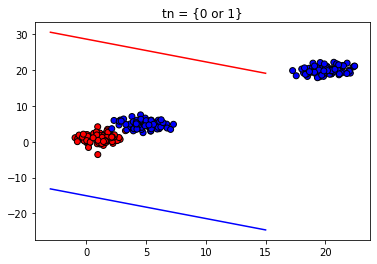

In [8]:
T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-3, 15)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {0 or 1}")
plt.show()

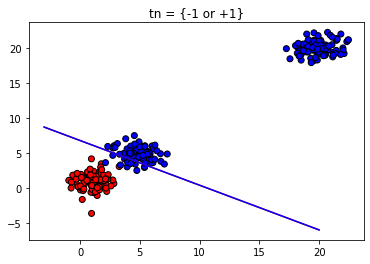

In [9]:
T = (-1) * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-3, 20)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {-1 or +1}")
plt.show()

11. Explain what's wrong with the lines.

This is the inherent problem with least square problem, which is the decision line produced by least square is very sensitive to the outliers. This is because the discriminant/objective function does not discriminate the contributing influence of each point and as a result, sum of squares of error is extremely sensitive to any change in the data, even to the outliers.

In the case where we set tn to be {0, 1}, what red line is trying to do is to be as close as to the **center/mean** of the blue dots cluster, and as far as from the red dots. Since blue dots (which belongs to the same class) are separated into two clusters, the red lines would be relatively in the middle of the two clusters. For the blue line, the situation is similar to exercise 6. Since the amount of blue dots is double of that of red dots, the blue line is pushed much further way by blue dots then red dots' ability to pull back.

In the case where we set tn to be {-1, +1}, what red line and blue line are trying to do is to be pushed by both classes of data to the middle of both classes. However, since sum of squares of error is calculated indiscriminately to account all data points. Intuitively, sum of squares error function is accounting the errors generated by the outliers and to minimze the sum of squares error, the decision lines would also have to move towards the outliers. 

Therefore, in both cases, the lines have located at where they supposed to be located according to the least squares. However, because least squares itself is a fairly simple discriminant function that lack robustness, it does not do a good job in classification when there are outliers.

12. Generate data, similar to the figure below (where the red population is 10 and blue's population is 200; the first principal axis of red is vertical and the first principal axis of blue are horizontal):

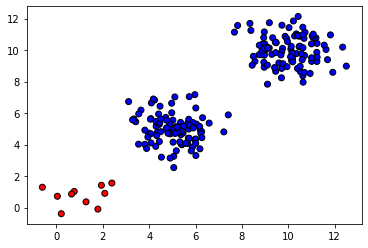

In [10]:
N1 = 10
N2 = 100
K = 2
sigma = 1.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2_original = np.random.multivariate_normal(mean, cov, N2)

mean = (10, 10)
cov = [[sigma, 0], [0, sigma]]
X2_outlier = np.random.multivariate_normal(mean, cov, N2)

X2 = np.concatenate((X2_original, X2_outlier))
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

13. Compute matrix W, and draw the decision lines

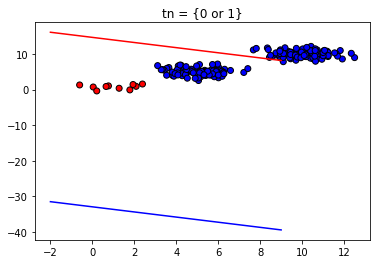

In [11]:
T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-2, 9)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {0 or 1}")
plt.show()

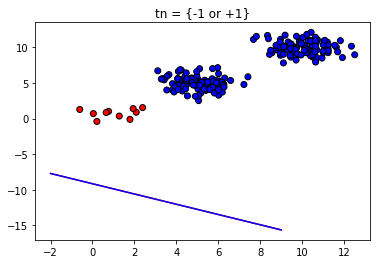

In [12]:
T = (-1) * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    if(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-2, 9)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.title("tn = {-1 or +1}")
plt.show()

14. Discuss why the lines are in wrong positions

This is the inherent problem with least square problem, which is the decision line produced by least square is very sensitive to the amount of the data points. This is because the discriminant/objective function does not discriminate the contributing influence of each point and as a result, sum of squares of error is extremely sensitive to any data. Therefore, similar to the exercise 6, if the class with more data points will has larger influence on the decision lines than the class with fewer data points.

In the case where we set tn to be {0, 1}, what red line is trying to do is to be as close as to the **center/mean** of the blue dots cluster, and as far as from the red dots. Since blue dots (which belongs to the same class) are separated into two clusters, the red lines would be relatively in the middle of the two clusters. For the blue line, the situation is similar to exercise 6. Since the amount of blue dots is much more than that of red dots, the blue line is pushed much further way by blue dots then red dots' ability to pull back.

In the case where we set tn to be {-1, +1}, what red line and blue line are doing is that they are both being pushed by two classes of data in opposite directions. However, since sum of squares of error is calculated indiscriminately to account all data points. Intuitively, because there are much more blue dots than red dots, blue dots have much "stronger" push ability than red dots. As a result, the push ability of blue dots **overpowers** that of red dots, and lines will be pushed over the red dots and end up in a location far away from blue dots, and in the opposite direction of red dots. 

Therefore, in both cases, the lines have located at where they supposed to be located according to the least squares. However, because least squares itself is a fairly simple discriminant function that lack robustness, it does not do a good job in classification when there are imbalance in the amount of data in different classes. 

15. Write code to generate 3 classes, where the means of the 3 clusters are located at (1,5), (5,10) and (10,5). Set sigma = 1. Display the result.

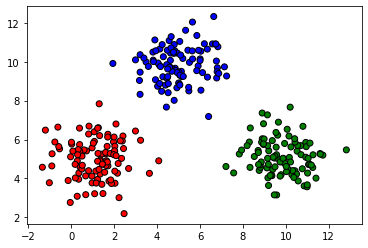

In [13]:
N1 = 100
N2 = 100
N3 = 100
K = 3
sigma = 1.0

mean = (1, 5)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 10)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

mean = (10, 5)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['green'] * len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    elif(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
    else:
        T[n][2] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

16. Compute W, and draw the decision lines:

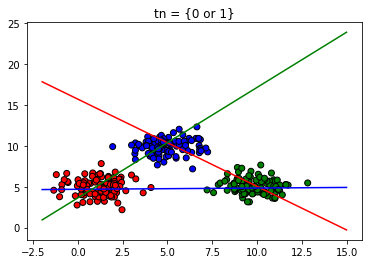

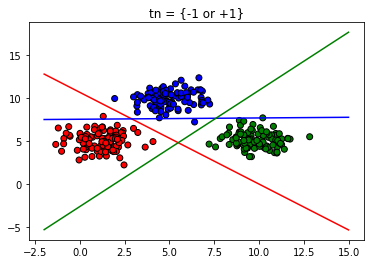

In [14]:
X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-2, 15)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 
line_y3 = -W[0][2] / W[2][2] - (W[1][2] / W[2][2]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.plot(line_x, line_y3, color = 'g')
plt.title("tn = {0 or 1}")
plt.show()

T = (-1) * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    elif(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
    else:
        T[n][2] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-2, 15)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 
line_y3 = -W[0][2] / W[2][2] - (W[1][2] / W[2][2]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.plot(line_x, line_y3, color = 'g')
plt.title("tn = {-1 or +1}")
plt.show()

17. Change the means to (1,5), (5,10), (10,15), and draw the decision lines.

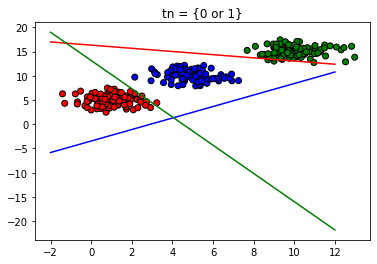

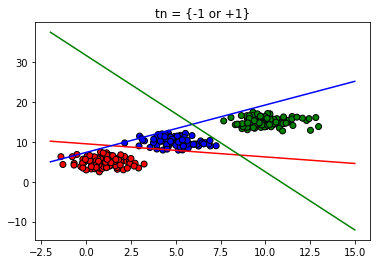

In [15]:
N1 = 100
N2 = 100
N3 = 100
K = 3
sigma = 1.0

mean = (1, 5)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 10)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

mean = (10, 15)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['green'] * len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

T = 0 * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    elif(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
    else:
        T[n][2] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-2, 12)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 
line_y3 = -W[0][2] / W[2][2] - (W[1][2] / W[2][2]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.plot(line_x, line_y3, color = 'g')
plt.title("tn = {0 or 1}")
plt.show()

T = (-1) * np.ones([len(X), K])
for n in range(0, len(X)):
    if(n < len(X1)):
        T[n][0] = 1
    elif(n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
    else:
        T[n][2] = 1
T = T.astype(int)

X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))
W = np.linalg.inv(X_input.T.dot(X_input)).dot(X_input.T.dot(T))

line_x = np.linspace(-2, 15)
line_y1 = -W[0][0] / W[2][0] - (W[1][0] / W[2][0]) * line_x 
line_y2 = -W[0][1] / W[2][1] - (W[1][1] / W[2][1]) * line_x 
line_y3 = -W[0][2] / W[2][2] - (W[1][2] / W[2][2]) * line_x 

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.plot(line_x, line_y1, color = 'r')
plt.plot(line_x, line_y2, color = 'b')
plt.plot(line_x, line_y3, color = 'g')
plt.title("tn = {-1 or +1}")
plt.show()

18. Concerning the decision lines, discuss what you observe

As we can observe in the case where the means of the 3 clusters are located at (1,5), (5,10) and (10,5), for tn = {0, 1}, the green line is far away from the cluster of green dots and close to the center of blue and center of red clusters; the blue line is far away from the cluster of blue dots and close to the center of red and center of green clusters; the red line is far away from the cluster of red dots and close to the center of green and center of blue clusters. This aligns well the geometric meaning of least square method. And for tn = {-1, 1}, the classification performance seems to work fine.

In the case where the means of the 3 clusters are located at (1,5), (5,10) and (10,15), for tn = {0, 1}, the green line is far away from the cluster of green dots and close to the center of blue and center of red clusters; the red line is far away from the cluster of red dots and close to the center of green and center of blue clusters.

However for the blue line, it should be far away from the blue cluster and close to the center of green and red clusters, but because the blue cluster is in the middle of green clusters and red clusters, blue line has to be pushed away yet also close to iteself. This decision behavior makes the blue line useless, as it should demarcate blue cluster from the rest. And for tn = {-1, 1}, for a correct classification we expect red and green lines to be parallel to each other. However, as we can observe, much more spaces have been given to green and red dots, and only a small irregular triangle space has been given to blue dots. 

Therefore, we seem to observe that for the least square method, it makes an underlying assumption about the distribution of data. If the distribution is "balanced", then the classification performs well. However, if data is not distributed in a balanced way (whether its location on the graph, or amount of data in different classes varies greatly), then classification performance suffers. Indeed, as we recall, the least square method actually corresponds to maximum likelihood under the assumption of a Gaussian conditional distribution. Yet often, binary target vectors clearly have a distribution that is far from Gaussian. That is why we are observing some strange positions of decision lines with the least-squares method.



## Part2: Predictive Distribution

1. Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2

In [16]:
# generate data
N1 = 50
N2 = 50
K = 3
sigma = 0.1

mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2_1 = np.random.multivariate_normal(mean, cov, N2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
X2_2 = np.random.multivariate_normal(mean, cov, N2)

X2 = np.concatenate((X2_1, X2_2))
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

t = 1 * np.ones([len(X), 1])
for n in range(0, len(X)):
    if(n < len(X1)):
        t[n] = 0
t = t.astype(int)

alpha = 20
S_0_inv = (1 / alpha) * np.identity(3)
m_0 = np.zeros((3, 1))

# X input matrix
X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))

R = np.zeros((len(X), len(X)))
sigmoid = np.zeros((len(X), 1))

w_map = np.zeros((3, 1))

delta = 1

while(delta > 0.00001):

    for n in range(len(X)):
        x_n = X_input[n]
        sigmoid_n = 1 / (1 + np.exp(-w_map.T.dot(x_n)))
        sigmoid[n] = sigmoid_n
        R[n][n] = sigmoid_n * (1 - sigmoid_n)

    H = S_0_inv + X_input.T.dot(R).dot(X_input)

    delta_e_w = S_0_inv.dot(w_map - m_0) + X_input.T.dot(sigmoid - t)
    w_map = w_map - np.linalg.inv(H).dot(delta_e_w)
    delta = np.linalg.norm(np.linalg.inv(H).dot(delta_e_w))
    
def get_pred_prob(w_map, S_N, x_new):
    x_new = np.insert(x_new, 0, 1, axis=0)
    a_map = w_map.T.dot(x_new)
    sigma_N = x_new.T.dot(S_N).dot(x_new)
    pred_prob = 1 / (1 + np.exp(-(a_map / np.power(1 + (np.pi / 8) * sigma_N, 1 / 2))))
    return pred_prob

2. Generate data 

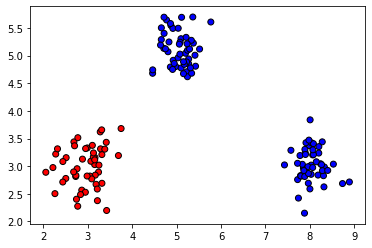

In [17]:
# show data
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

3. Based in the generated data, compute the probability map

<function matplotlib.pyplot.show(*args, **kw)>

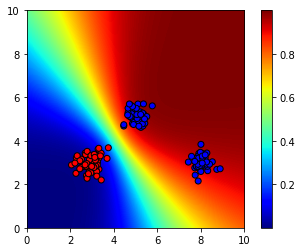

In [18]:
S_N = np.linalg.inv(H)

x_1, x_2 = np.meshgrid(np.arange(0,10,0.1),np.arange(0,10,0.1))
prob_data = np.zeros((x_1.shape[0], x_1.shape[0]))
for i in range(x_1.shape[0]):
    for j in range(x_1.shape[0]):
        prob_data[i][j] = get_pred_prob(w_map, S_N, np.array([[x_1[i][j]], [x_2[i][j]]]))
        
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,10,0,10], interpolation = 'bilinear', origin = 'lower')
plt.colorbar()
plt.show

4. Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information. 

Run the below section to input new value of x. The uncertain information is a probability value, which means that given the previous data and labels, how certain the model is with regards to whether the new x belows to C1 (same class as blue dots). If the probability is very high, then the model is very certain that the new x belows to C1; if the probability is very low, then the model is very certain that the new x is very **unlikely** to belong to C1 (so very likely that the new x belongs to C2). If the probability to not too high or too low, then the model can still make a decision, but the uncertainty might be high.

In [19]:
print("Input x1 value: ")
x1 = float(input())
print("Input x2 value: ")
x2 = float(input())
prob = get_pred_prob(w_map, S_N, np.array([[x1], [x2]]))
if prob > 0.5:
    print("C1: same class as blue dots")
    print("uncertainty: ", prob[0][0])
else:
    print("C2: same class as red dots")
    print("uncertainty: ", prob[0][0])


Input x1 value: 
3
Input x2 value: 
6
C1: same class as blue dots
uncertainty:  0.5818240539071401
